In [1]:
import sys 
sys.path.append('../')

import torch 
import matplotlib.pyplot as plt
from utils import * 
from mlmm import *
from dataset import reference_test

In [2]:
l = 8
k = 5
m = 7
order = 2
uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, 'lnabs')
wh_ml, KHH, Khh_banddiff_lst, boundary_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m)

In [3]:
xh_ml = mlgrid1d(xh, k)

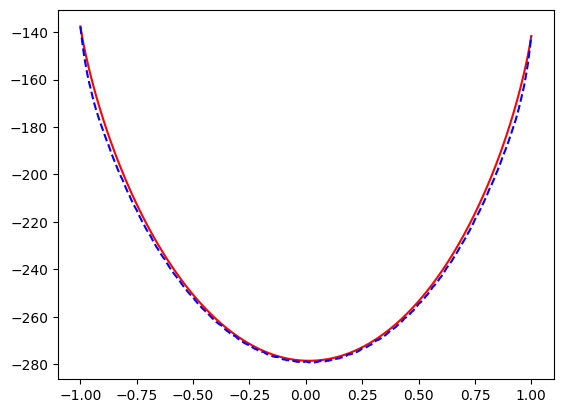

In [4]:
plt.plot(xh[0,0], wh_numeric[0,0], '-r')
# plt.plot(xh_ml[0][0,0], wh_ml[0][0,0], '-b')
# plt.plot(xh_ml[1][0,0], wh_ml[1][0,0], '-.b')
plt.plot(xh_ml[-1][0,0], wh_ml[-1][0,0], '--b')

In [5]:
Khh_banddiff_lst = []
uh_band_lst = []
lb_lst = []
rb_lst = []
idx_j_lst = []
idx_i_lst = []

In [6]:
full_idx_lst = []

for i in range(k):
    # for boundaries
    lb_idx = [torch.zeros(2**(l-i)+1), torch.arange(2**(l-i)+1)]
    rb_idx = [torch.ones(2**(l-i)+1)*2**(l-i), torch.arange(2**(l-i)+1)]
        
    # fetch nbr idx
    n = Khh.shape[-1] 
    idx_i, idx_j = fetch_nbrs(n, m)
    idx_j[idx_j < 0] = 0 
    idx_j[idx_j > n-1] = n-1

    local_idx = [idx_i, idx_j]
    break 

In [7]:
mask = torch.zeros(2**l+1, 2**l+1)

full_idx_lst = []
for i in range(k):
    level_idx_lst = []
    level_lbidx_lst = []
    level_rbidx_lst = []

    for bi in range(2**(l-i)+1):
        mask[0, bi*2**i] += 1
        mask[2**(l-i)*2**i, bi*2**i] += 1 
        level_lbidx_lst.append([0, bi*2**i])
        level_lbidx_lst.append([2**(l-i)*2**i, bi])
    level_idx_lst = [level_lbidx_lst, level_rbidx_lst]

    n = Khh[:,:,:,::2**(i)].shape[-1] 
    idx_i, idx_j = fetch_nbrs(n, m)
    idx_j[idx_j < 0] = 0 
    idx_j[idx_j > n-1] = n-1
    
    idx_i = idx_i.reshape(-1)
    idx_j = idx_j.reshape(-1)
    for li, lj in zip(idx_i, idx_j):
        mask[li*2**i, lj*2**i] += 1
    
    level_idx_lst.append(list(zip(idx_i, idx_j)))
    full_idx_lst.append(level_idx_lst)

n = Khh[:,:,:,::2**k].shape[-1]
idx_ij = torch.cartesian_prod(torch.arange(n), torch.arange(n))
for li, lj in idx_ij:
    mask[li*2**k, lj*2**k] += 1

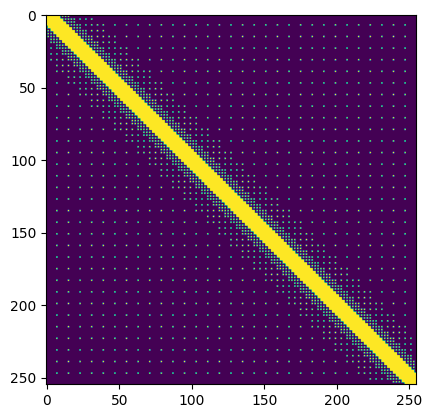

In [8]:
plt.imshow(mask[1:-1,1:-1]>0)